# Partial Observations

This notebook describes how to create partial observability in pc-gym.

In [1]:
from pcgym import make_env
import numpy as np 
from stable_baselines3 import PPO

In [2]:
T = 26
nsteps = 100
SP = {
    'Ca': [0.85 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
}

To create partial observability, we create a list of states that are **visible** to the agent. The agent will only see these states. The rest of the states will be hidden from the agent by assigning them a value of 0.

In [ ]:
action_space = {
    'low': np.array([295]),
    'high':np.array([302]) 
}

r_scale ={
    'Ca': 1e3 #Reward scale for each state
}

# Continuous box observation space
observation_space = {
    'low' : np.array([0.7,300,0.8]),
    'high' : np.array([1,350,0.9])  
}


env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP':SP, # Setpoint
    'o_space' : observation_space, # Observation space
    'a_space' : action_space, # Action space
    'x0': np.array([0.8,330,0.8]), # Initial conditions 
    'model': 'cstr', # Select the model
    'normalise_a': True, # Normalise the actions
    'normalise_o':True, # Normalise the states,
    'noise':True, # Add noise to the states
    'integration_method': 'casadi', # Select the integration method
    'r_scale': r_scale, # Reward scaling
    'noise_percentage':{'Ca':0.01,'T':0.0005}, # Noise percentage
    'partial_observation':['T'] # Only temperature is observed

    
}
env = make_env(env_params)

c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [4]:
print(env.reset())
print(env.step(np.array([0.5])))

(array([ 0.        ,  0.2       , -1.00000024]), {'obs': array([-0.33333328,  0.2       , -1.00000024]), 'r_init': 0})
(array([0.00000000e+00, 1.37631644e-01, 1.19209332e-07]), -1.7989126868592233, False, False, {'obs': array([-3.32911675e-01,  1.37631644e-01,  1.19209332e-07]), 'r_init': 0})


In [5]:
nsteps_learning = 1e4
PPO_policy = PPO('MlpPolicy', env, verbose=1,learning_rate=0.001).learn(nsteps_learning)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 99       |
|    ep_rew_mean     | -86.5    |
| time/              |          |
|    fps             | 894      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 99          |
|    ep_rew_mean          | -77.8       |
| time/                   |             |
|    fps                  | 700         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004377254 |
|    clip_fraction        | 0.0459      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.00394     |
|    learning_rate        | 0.

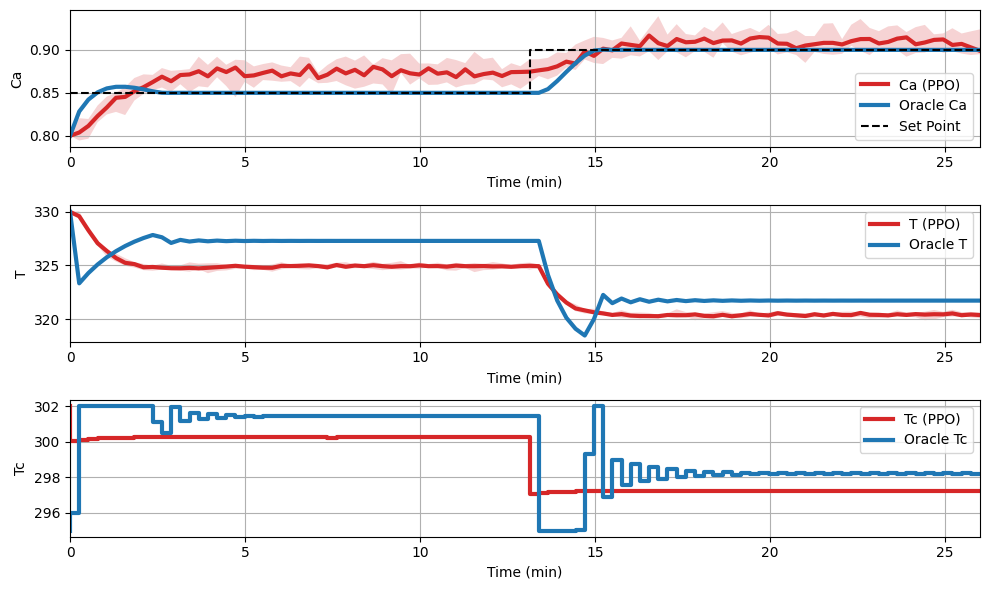

In [6]:

evaluator, data = env.plot_rollout({'PPO': PPO_policy}, oracle = True, reps = 10)